<a href="https://colab.research.google.com/github/irfanfadhullah/DTI-Telkom/blob/main/Mall_Customers_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/irfanfadhullah/DTI-Telkom/main/dataset/data.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
plt.rcParams['figure.figsize'] = (15,8)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


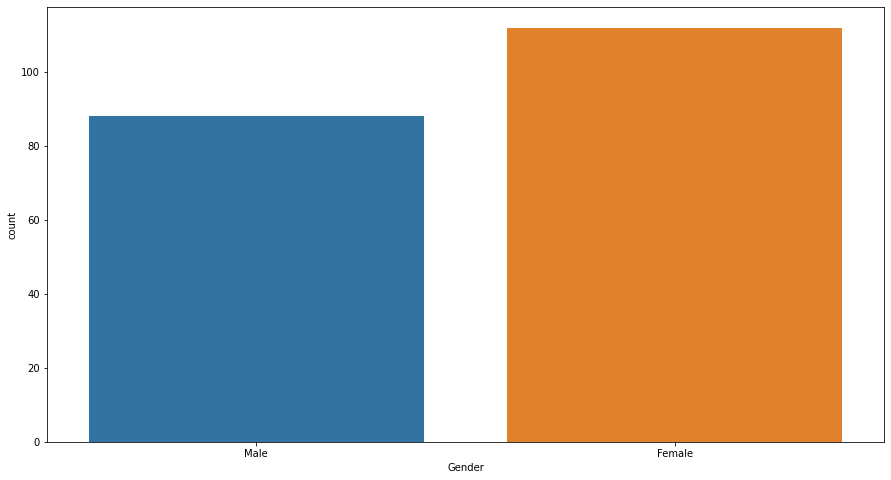

In [10]:
sns.countplot(df['Gender'])

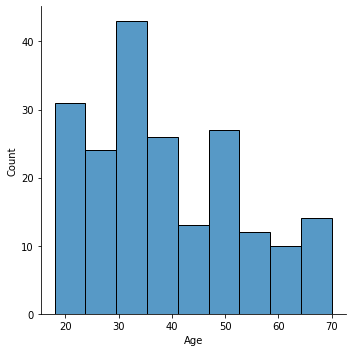

In [11]:
sns.displot(df['Age'])

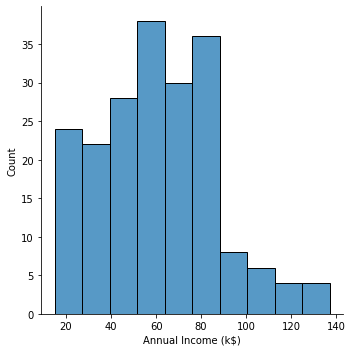

In [12]:
sns.displot(df['Annual Income (k$)'])

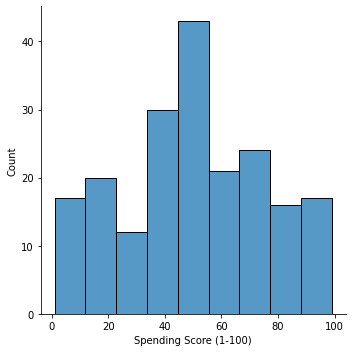

In [13]:
sns.displot(df['Spending Score (1-100)'])

#Preprocessing

Pada Tahap Preprocessing ini dilakukan sebuah pemrosesan data mulai dari mengubah categorical bentuk string atau objek menjadi numerical categorical, melakukan scaling data, dan menghapus kolom yang tidak diperlukan

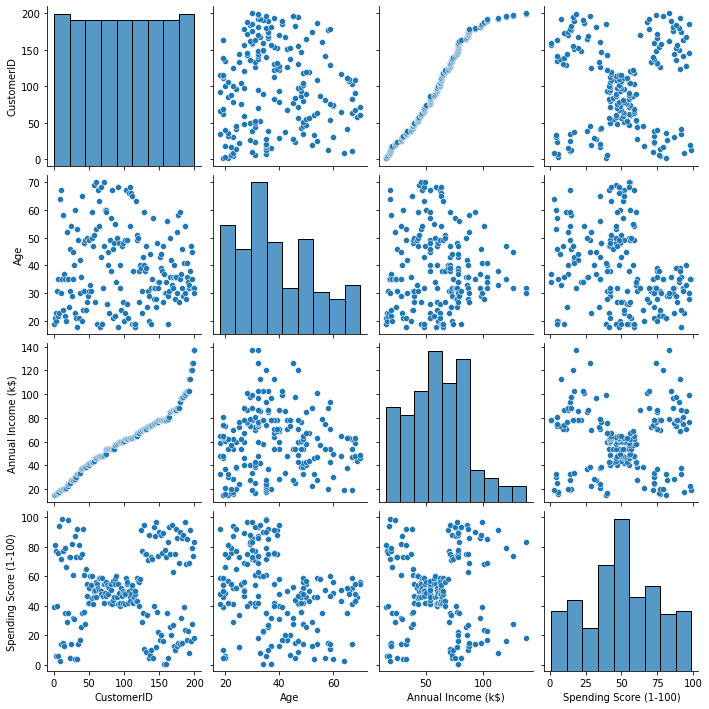

In [14]:
sns.pairplot(df)

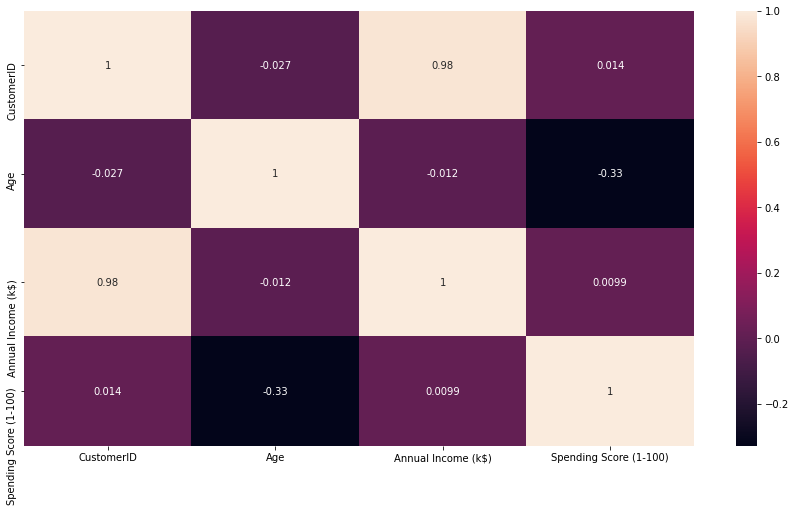

In [15]:
sns.heatmap(df.corr(), annot=True)

In [16]:
df['Gender'] = df['Gender'].map({'Male':1, 'Female':0})
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [17]:
df.drop('CustomerID', axis=1, inplace=True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [19]:
data_scaled=scaler.fit(df)
data_scaled = scaler.fit_transform(df)
data_scaled

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

In [20]:
data_scaled=pd.DataFrame(data_scaled,index=df.index, columns=df.columns)

#Modeling

### 1. Scoring Berdasarkan Gender ,Annual Income dan Spending



In [21]:
segment1 = data_scaled.iloc[:,[0,2,3]]
segment2 = data_scaled.iloc[:,[1,2,3]]

In [22]:
overall = pd.DataFrame()

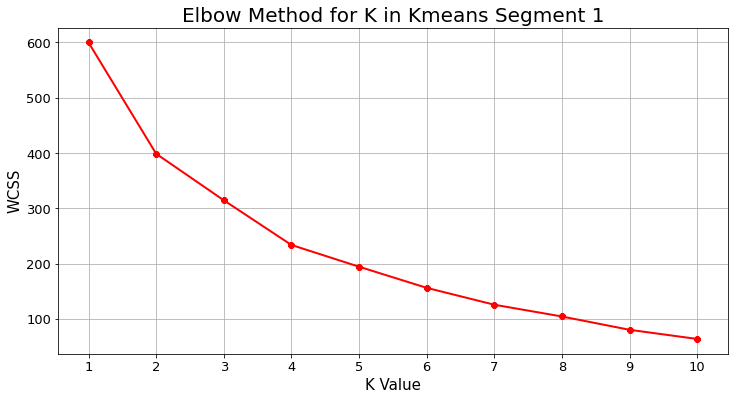

In [23]:
from sklearn.cluster import KMeans

wcss = []
for k in range(1,11):
  kmeans=KMeans(n_clusters=k, init="k-means++")
  kmeans.fit(segment1)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value", fontsize=15)
plt.yticks(fontsize=13)
plt.xticks(np.arange(1,11,1),fontsize=13)
plt.ylabel("WCSS",fontsize=15)
plt.title('Elbow Method for K in Kmeans Segment 1', fontsize=20)
plt.savefig('Elbow Method for K in Kmeans Segment 1.png', transparent=True, dpi=50)
plt.show()

In [24]:
model1 = KMeans(n_clusters=4, init = 'k-means++', random_state = 42)
segment1["label"] = model1.fit_predict(segment1)
overall['segment1'] = model1.fit_predict(segment1)

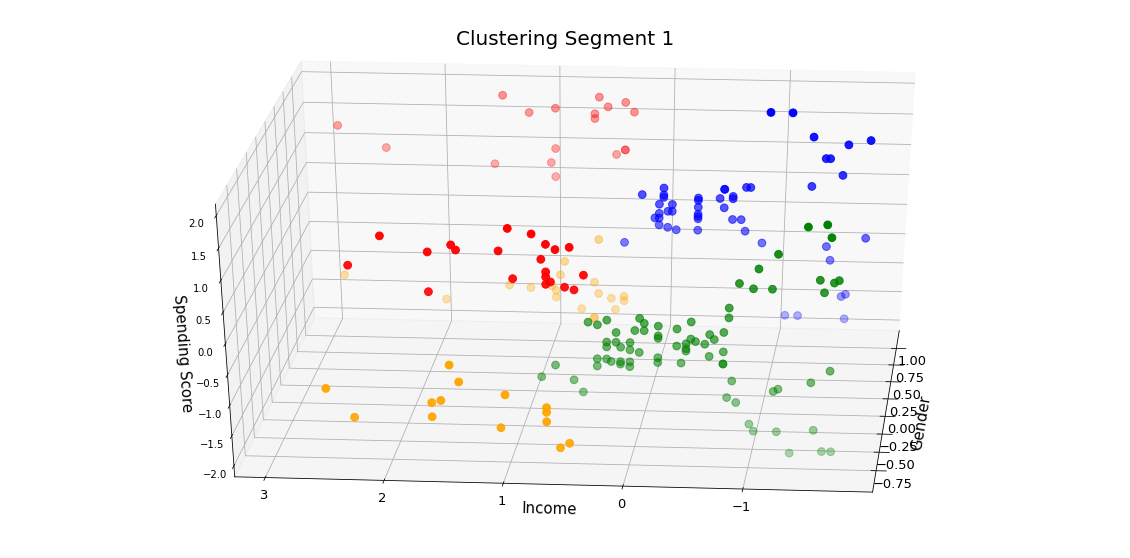

In [25]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(segment1.Gender[segment1.label == 0], segment1['Annual Income (k$)'][segment1.label == 0], segment1['Spending Score (1-100)'][segment1.label == 0], c='blue', s=60)
ax.scatter(segment1.Gender[segment1.label == 1], segment1['Annual Income (k$)'][segment1.label == 1], segment1['Spending Score (1-100)'][segment1.label == 1], c='red', s=60)
ax.scatter(segment1.Gender[segment1.label == 2], segment1['Annual Income (k$)'][segment1.label == 2], segment1['Spending Score (1-100)'][segment1.label == 2], c='green', s=60)
ax.scatter(segment1.Gender[segment1.label == 3], segment1['Annual Income (k$)'][segment1.label == 3], segment1['Spending Score (1-100)'][segment1.label == 3], c='orange', s=60)
ax.view_init(30, 185)
plt.xlabel("Gender",fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel("Income",fontsize=15)
ax.set_zlabel('Spending Score',fontsize=15)
plt.title('Clustering Segment 1',fontsize=20)
plt.show()

### 2. Scoring Berdasarkan Age, Annual Income, dan Sending

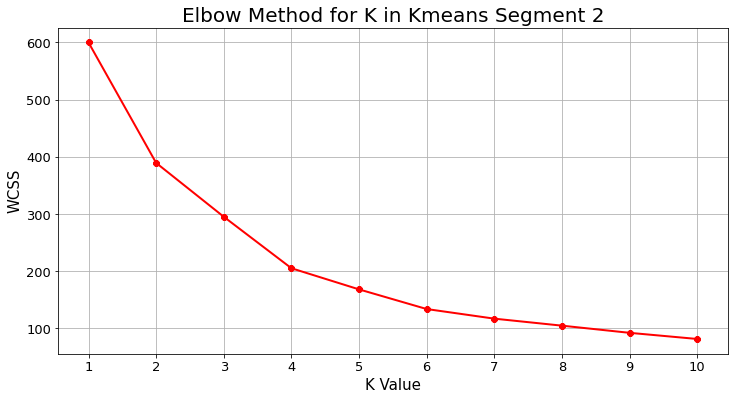

In [26]:
wcss = []
for k in range(1,11):
  kmeans=KMeans(n_clusters=k, init="k-means++")
  kmeans.fit(segment2)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value", fontsize=15)
plt.yticks(fontsize=13)
plt.xticks(np.arange(1,11,1),fontsize=13)
plt.ylabel("WCSS",fontsize=15)
plt.title('Elbow Method for K in Kmeans Segment 2', fontsize=20)
plt.show()

In [27]:
model2 = KMeans(n_clusters=4, init = 'k-means++', random_state = 42)
segment2["label"] = model2.fit_predict(segment2)
overall['segment2'] = model2.fit_predict(segment2)

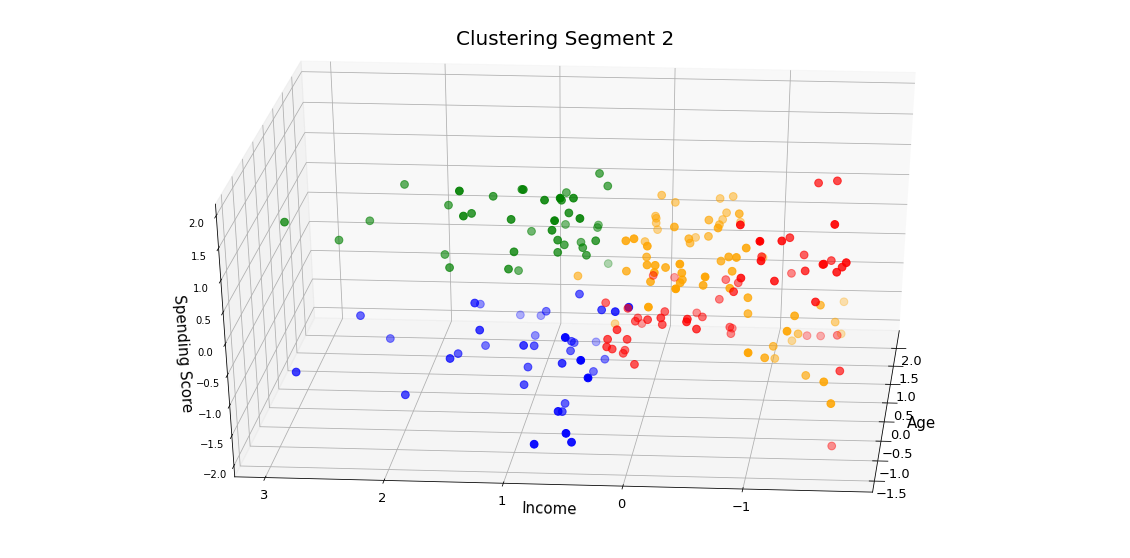

In [28]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(segment2.Age[segment2.label == 0], segment2['Annual Income (k$)'][segment2.label == 0], segment2['Spending Score (1-100)'][segment2.label == 0], c='blue', s=60)
ax.scatter(segment2.Age[segment2.label == 1], segment2['Annual Income (k$)'][segment2.label == 1], segment2['Spending Score (1-100)'][segment2.label == 1], c='red', s=60)
ax.scatter(segment2.Age[segment2.label == 2], segment2['Annual Income (k$)'][segment2.label == 2], segment2['Spending Score (1-100)'][segment2.label == 2], c='green', s=60)
ax.scatter(segment2.Age[segment2.label == 3], segment2['Annual Income (k$)'][segment2.label == 3], segment2['Spending Score (1-100)'][segment2.label == 3], c='orange', s=60)
ax.view_init(30, 185)
plt.xlabel("Age",fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel("Income",fontsize=15)
ax.set_zlabel('Spending Score',fontsize=15)
plt.title('Clustering Segment 2',fontsize=20)
plt.show()

##Scoring Hasil Akhir

Scoring disini dengan menjumlahkan hasil clustr di segmen 1 dan segmen 2. <br>
Setelah dijumlahkan lalu hasil scoring akhir di buat rentang sebagai berikut: <br> 
1. Kategori 1 Jumlahnya anatar 1 dan 2 <br>
1. Kategori 2 Jumlahnya anatar 3 dan 4 <br>
1. Kategori 3 Jumlahnya anatar 5 dan 6

In [29]:
overall['all'] = overall['segment1'] + overall['segment2']
overall.head()

,segment1,segment2,all
0,1,3,4
1,1,3,4
2,2,3,5
3,2,3,5
4,2,3,5


In [30]:
overall['all'].value_counts()

3    77
2    60
5    34
4    28
1     1
Name: all, dtype: int64

In [31]:
data_scaled['scoring']=overall['all']
data_scaled.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),scoring
0,1.128152,-1.424569,-1.738999,-0.434801,4
1,1.128152,-1.281035,-1.738999,1.195704,4
2,-0.886405,-1.352802,-1.700830,-1.715913,5
3,-0.886405,-1.137502,-1.700830,1.040418,5
4,-0.886405,-0.563369,-1.662660,-0.395980,5


In [32]:
data_scaled['scoring'] = data_scaled['scoring'].map({1:1,2:1,3:2,4:2,5:3,6:3})
data_scaled.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),scoring
0,1.128152,-1.424569,-1.738999,-0.434801,2
1,1.128152,-1.281035,-1.738999,1.195704,2
2,-0.886405,-1.352802,-1.700830,-1.715913,3
3,-0.886405,-1.137502,-1.700830,1.040418,3
4,-0.886405,-0.563369,-1.662660,-0.395980,3


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 1440x1440 with 0 Axes>

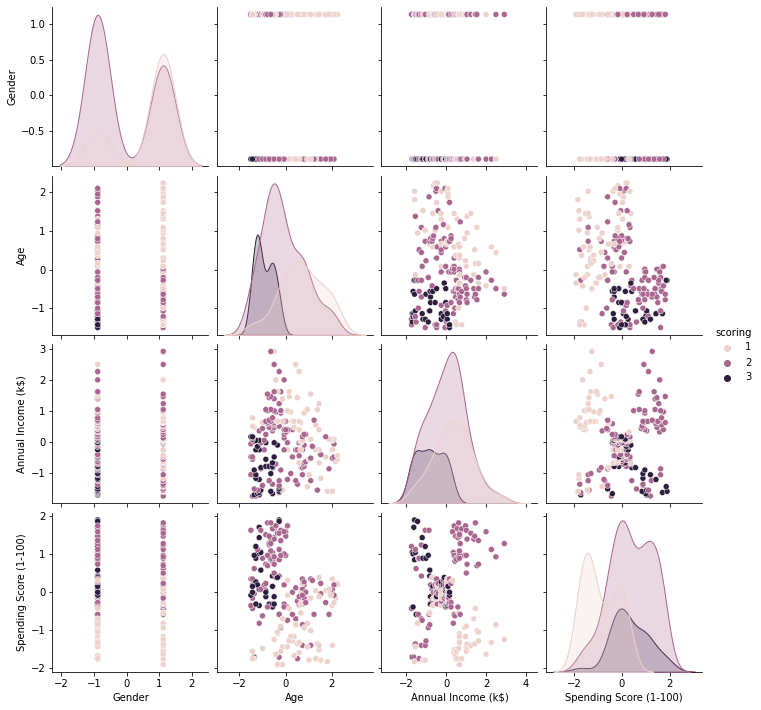

In [33]:
plt.figure(figsize=(20,20))
sns.pairplot(data=data_scaled, hue='scoring')